<a href="https://colab.research.google.com/github/Lorrandaudosso/An-lise-do-Comportamento-de-Clientes-e-Tend-ncias-de-Compra/blob/main/An%C3%A1lise_do_Comportamento_de_Clientes_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#  Análise do Comportamento de Clientes e Tendências de Compra

Este projeto tem como objetivo entender o comportamento dos clientes de uma empresa com base em características como idade, renda anual, região e frequência de compra. A partir dessa análise, busco identificar padrões de compra e segmentar os clientes para fornecer insights acionáveis que possam guiar estratégias de marketing e vendas mais eficazes.

## Metodologia

**O estudo foi estruturado em várias etapas:**

**Coleta e Limpeza de Dados:** Realizei o pré-processamento dos dados para lidar com valores ausentes e garantir que os dados estivessem prontos para a análise.

**Exploração e Análise:** Analisei a distribuição etária, a variação de renda anual por região e o valor médio de compra em diferentes locais. Além disso, investiguei a correlação entre a frequência de compras e o valor gasto, bem como a relação entre a idade e a pontuação de lealdade.

**Segmentação de Clientes:** Os clientes foram segmentados com base em sua idade e renda, destacando aqueles de alta renda, que são os maiores contribuidores para a receita total da empresa.

**Visualizações e Insights:** As visualizações ajudaram a identificar padrões de comportamento dos clientes, como a forte correlação entre a frequência de compra e o valor gasto, e a influência da idade na pontuação de lealdade.

## Bibliotecas

In [ ]:
# Importando as ibliotecas nessesarias.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Passo 1: Carregar e examinar os dados.

In [ ]:
# Carregando os dados do arquivo csv.
df = pd.read_csv("Customer Purchasing Behaviors.csv")
df.head(10)

,user_id,age,annual_income,purchase_amount,loyalty_score,region,purchase_frequency
0,1,25,45000,200,4.5,North,12
1,2,34,55000,350,7.0,South,18
2,3,45,65000,500,8.0,West,22
3,4,22,30000,150,3.0,East,10
4,5,29,47000,220,4.8,North,13
5,6,41,61000,480,7.8,South,21
6,7,36,54000,400,6.5,West,19
7,8,27,43000,230,4.2,East,14
8,9,50,70000,600,9.0,North,25
9,10,31,50000,320,5.5,South,17


In [ ]:
# imformaçoes do Dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 238 entries, 0 to 237
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   user_id             238 non-null    int64  
 1   age                 238 non-null    int64  
 2   annual_income       238 non-null    int64  
 3   purchase_amount     238 non-null    int64  
 4   loyalty_score       238 non-null    float64
 5   region              238 non-null    object 
 6   purchase_frequency  238 non-null    int64  
dtypes: float64(1), int64(5), object(1)
memory usage: 13.1+ KB


### Passo 2: Limpesa e preparação dos dados.

In [ ]:
# verificando se a valores ausentes
print(df.isnull().sum())

user_id               0
age                   0
annual_income         0
purchase_amount       0
loyalty_score         0
region                0
purchase_frequency    0
dtype: int64


**Resposta:** Como podemos ver em nosso Dataframe temos  nenhum valor faltante. entao nao precisamos fazer esse tratamento.

In [ ]:
# removendo duplicadas.
df = df.drop_duplicates()

**Obs:**  Apos a limpesa dos dados, temos um conjunto de dados mais confiavel para analse.

### Passo 3: Analise Exploratoria dos Dados (EDA)

In [ ]:
df.describe()

,user_id,age,annual_income,purchase_amount,loyalty_score,purchase_frequency
count,238.000000,238.000000,238.000000,238.000000,238.000000,238.000000
mean,119.500000,38.676471,57407.563025,425.630252,6.794118,19.798319
std,68.848868,9.351118,11403.875717,140.052062,1.899047,4.562884
min,1.000000,22.000000,30000.000000,150.000000,3.000000,10.000000
25%,60.250000,31.000000,50000.000000,320.000000,5.500000,17.000000
50%,119.500000,39.000000,59000.000000,440.000000,7.000000,20.000000
75%,178.750000,46.750000,66750.000000,527.500000,8.275000,23.000000
max,238.000000,55.000000,75000.000000,640.000000,9.500000,28.000000


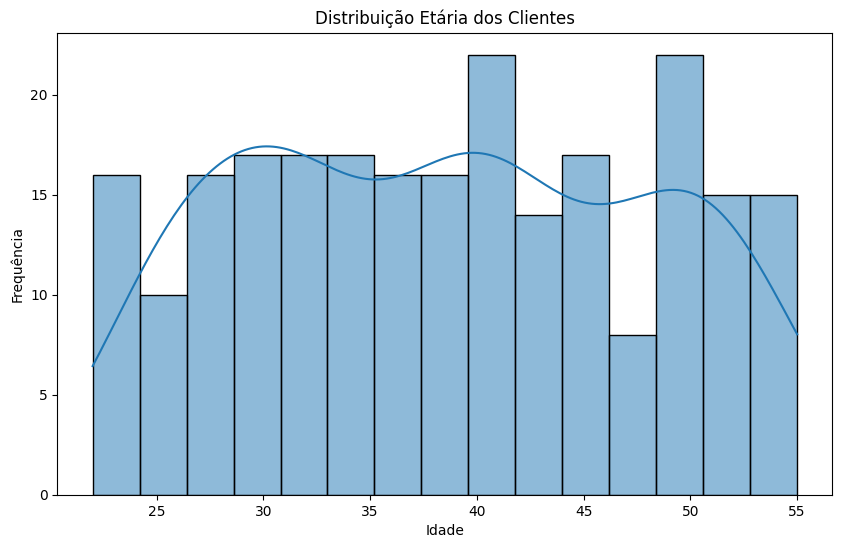

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(df['age'], bins=15, kde=True)
plt.title('Distribuição Etária dos Clientes')
plt.xlabel('Idade')
plt.ylabel('Frequência')
plt.show()

**Resposta:** As idades mais comuns entre nossos clientes são de 30 a 35 anos e de 45 a 50 anos.

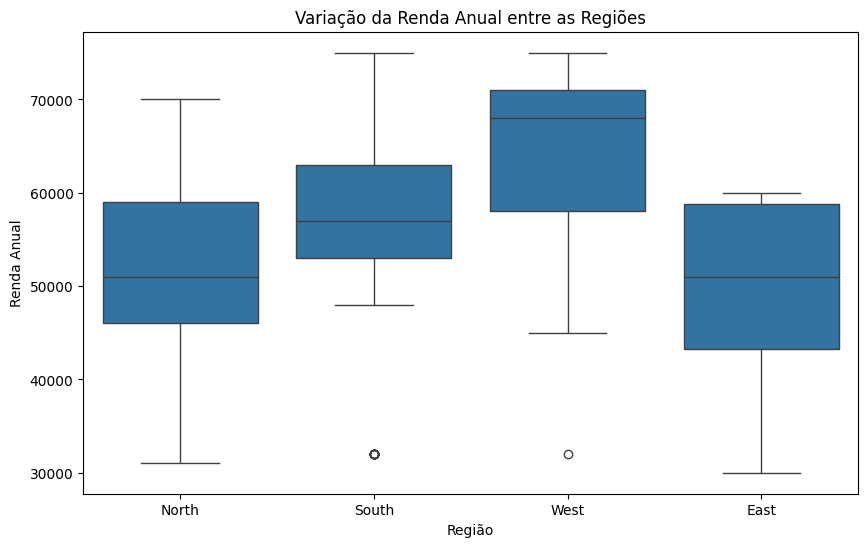

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='region', y='annual_income', data=df)
plt.title('Variação da Renda Anual entre as Regiões')
plt.xlabel('Região')
plt.ylabel('Renda Anual')
plt.show()

 **Resposta** A região North tem a mediana de renda mais alta entre todas as regiões. Já a região South apresenta uma distribuição de renda mais concentrada, com poucos outliers. Na região West, a renda varia bastante, exibindo uma faixa mais ampla de valores. Enquanto isso, a região East possui muitos outliers, indicando rendas muito altas ou muito baixas em comparação com a maioria dos dados.

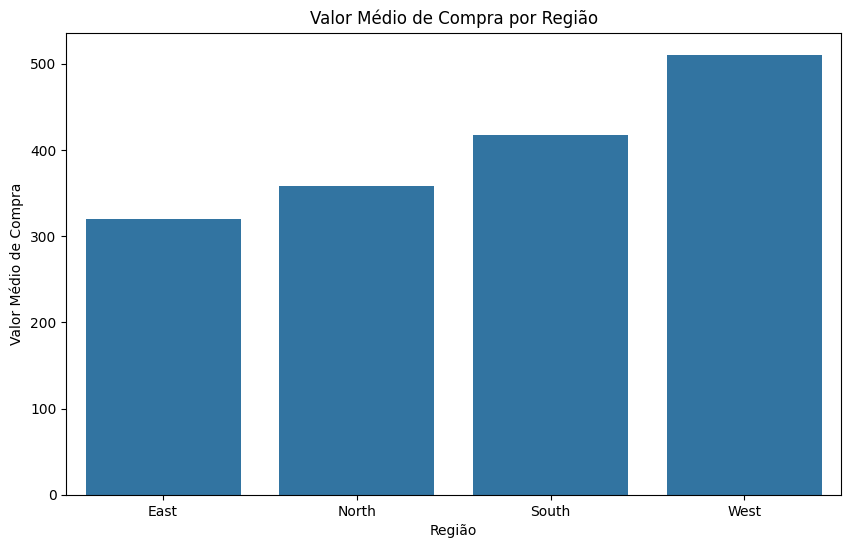

In [ ]:
average_purchase_by_region = df.groupby('region')['purchase_amount'].mean().reset_index()
plt.figure(figsize=(10, 6))
sns.barplot(x='region', y='purchase_amount', data=average_purchase_by_region)
plt.title('Valor Médio de Compra por Região')
plt.xlabel('Região')
plt.ylabel('Valor Médio de Compra')
plt.show()

**Resposta:** Podemos observar que a região West (Oeste) apresenta o maior valor médio de compra, em torno de 500 unidades monetárias, o que pode indicar clientes com maior poder aquisitivo ou hábitos de consumo mais intensos. As regiões North (Norte) e South (Sul) têm valores médios superiores a 400, sugerindo um perfil de consumo moderado. Por último, a região East (Leste) possui um valor médio em torno de 300, o que indica que, em comparação com as demais regiões, os consumidores gastam menos em média. Isso pode refletir um menor poder aquisitivo ou comportamentos de compra mais conservadores.

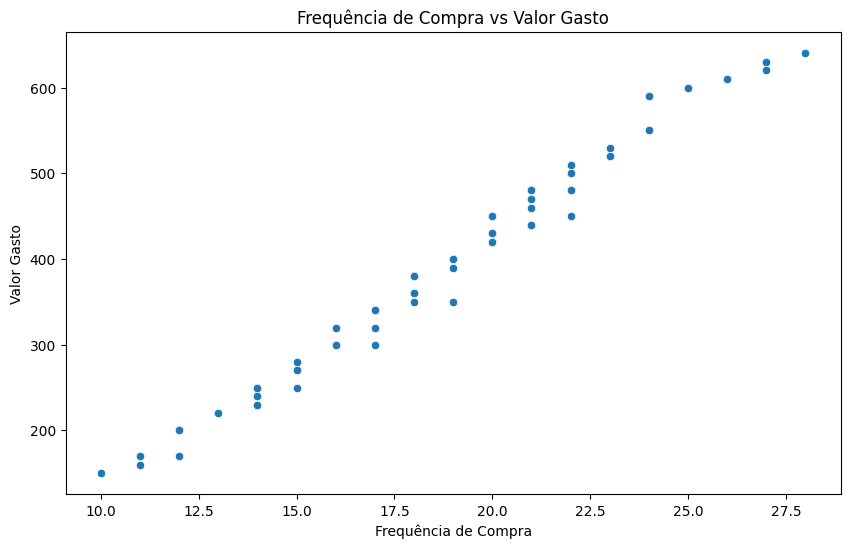

                    purchase_frequency  purchase_amount
purchase_frequency            1.000000         0.993579
purchase_amount               0.993579         1.000000


In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='purchase_frequency', y='purchase_amount', data=df)
plt.title('Frequência de Compra vs Valor Gasto')
plt.xlabel('Frequência de Compra')
plt.ylabel('Valor Gasto')
plt.show()

correlation = df[['purchase_frequency', 'purchase_amount']].corr()
print(correlation)

**Resposta:** Podemos observar uma correlação positiva entre as duas variáveis, o que indica que, à medida que a frequência aumenta, o valor gasto também tende a aumentar.

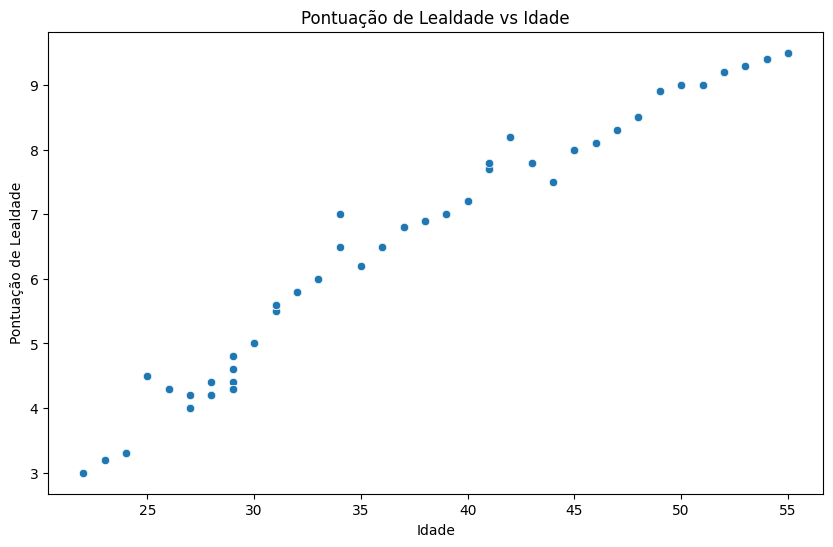

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='age', y='loyalty_score', data=df)
plt.title('Pontuação de Lealdade vs Idade')
plt.xlabel('Idade')
plt.ylabel('Pontuação de Lealdade')
plt.show()

**Resposta:** Podemos observar uma correlação positiva: à medida que a idade aumenta, a pontuação de lealdade também cresce. Além disso, existem alguns pontos fora da curva.

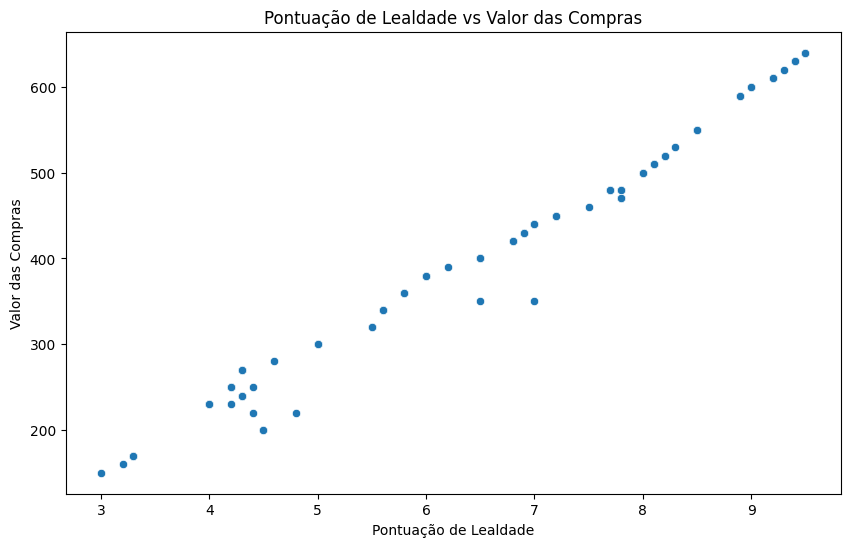

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='loyalty_score', y='purchase_amount', data=df)
plt.title('Pontuação de Lealdade vs Valor das Compras')
plt.xlabel('Pontuação de Lealdade')
plt.ylabel('Valor das Compras')
plt.show()

**Resposta:** Há uma tendência clara de que, à medida que a pontuação de lealdade aumenta, o valor das compras também cresce. Isso sugere que clientes mais leais tendem a gastar mais.

<ipython-input-21-60875058ec66>:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  segment_contribution = df.groupby('segment')['purchase_amount'].sum().reset_index()


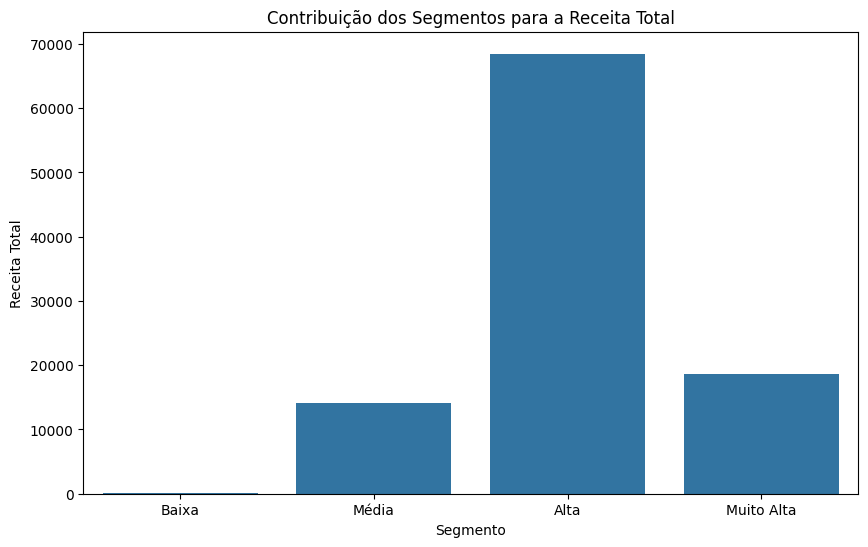

In [ ]:
.; df['segment'] = pd.cut(df['annual_income'], bins=[0, 30000, 50000, 70000, 100000],
                       labels=['Baixa', 'Média', 'Alta', 'Muito Alta'])
segment_contribution = df.groupby('segment')['purchase_amount'].sum().reset_index()
plt.figure(figsize=(10, 6))
sns.barplot(x='segment', y='purchase_amount', data=segment_contribution)
plt.title('Contribuição dos Segmentos para a Receita Total')
plt.xlabel('Segmento')
plt.ylabel('Receita Total')
plt.show()

**Resposta:** O gráfico mostra a contribuição de diferentes segmentos para a receita total. O segmento "Média" é o mais lucrativo, contribuindo com mais de 60.000. Os segmentos "Baixa" e "Muito Alta" têm contribuições moderadas, entre 20.000 e 30.000. O segmento "Alta" tem a menor contribuição, com cerca de 10.000.

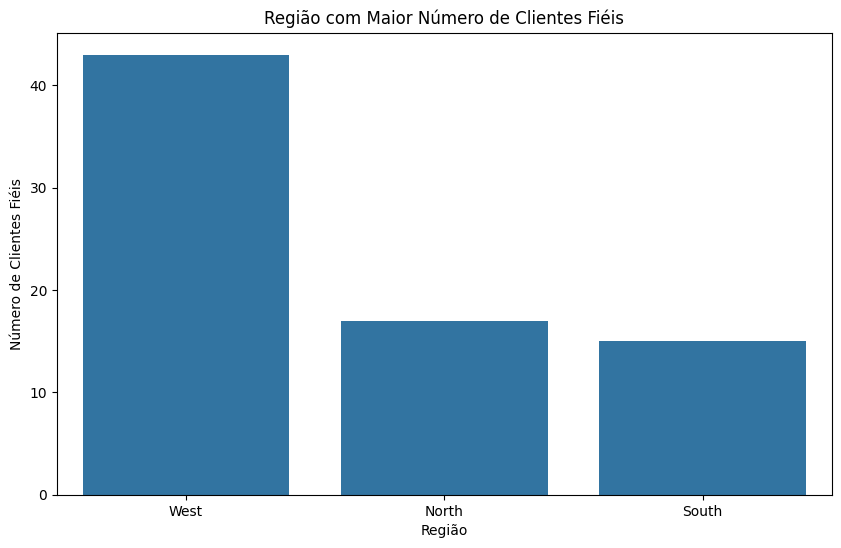

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(x='region', y='count', data=region_loyal_customers) # The x-axis should be 'region' and the y-axis should be 'count'
plt.title('Região com Maior Número de Clientes Fiéis')
plt.xlabel('Região')
plt.ylabel('Número de Clientes Fiéis')
plt.show()

**Resposta** O gráfico mostra a quantidade de clientes fiéis em três regiões. A região West tem o maior número de clientes fiéis, seguida pela North e, por último, pela South. Isso indica que a região Oeste é a mais bem-sucedida em termos de fidelização de clientes.

**Resposta** : a regiao west e aonde se consentra o maior numero de ciente

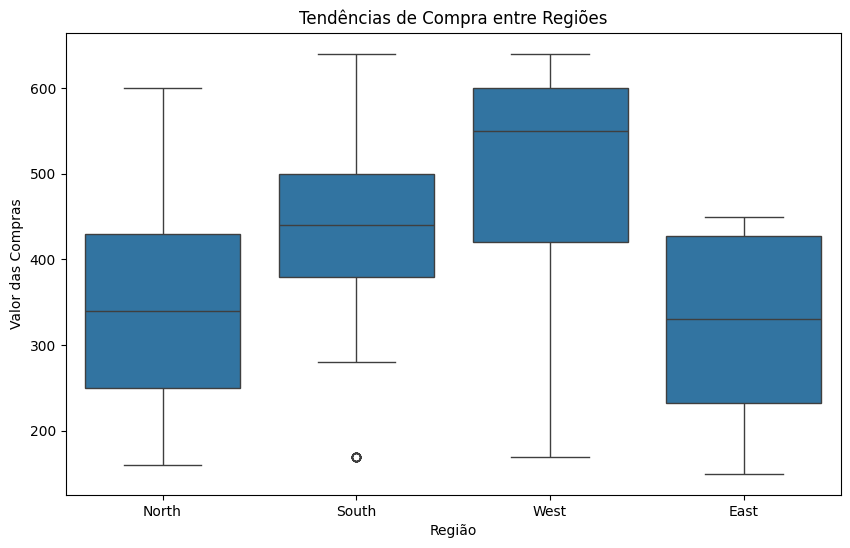

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='region', y='purchase_amount', data=df)
plt.title('Tendências de Compra entre Regiões')
plt.xlabel('Região')
plt.ylabel('Valor das Compras')
plt.show()

**Resposta** A região North apresenta a maior variabilidade nas tendências de compra, com um outlier abaixo do valor mínimo. As outras regiões têm distribuições mais concentradas e consistentes.

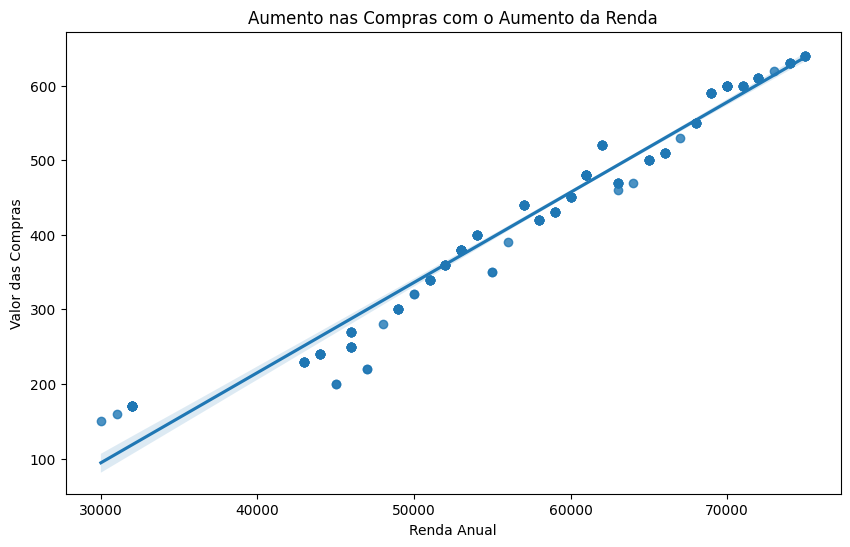

In [ ]:
plt.figure(figsize=(10, 6))
sns.regplot(x='annual_income', y='purchase_amount', data=df)
plt.title('Aumento nas Compras com o Aumento da Renda')
plt.xlabel('Renda Anual')
plt.ylabel('Valor das Compras')
plt.show()

**Resppsta** mostra uma clara correlação positiva entre a renda anual e o valor das compras. À medida que a renda anual aumenta, o valor das compras também tende a aumentar. A maioria dos pontos está alinhada de forma próxima a uma linha reta, indicando uma relação consistente entre a renda e as compras. Não há outliers significativos ou dados separados por regiões específicas, sugerindo que todos os pontos fazem parte de um único conjunto de dados.

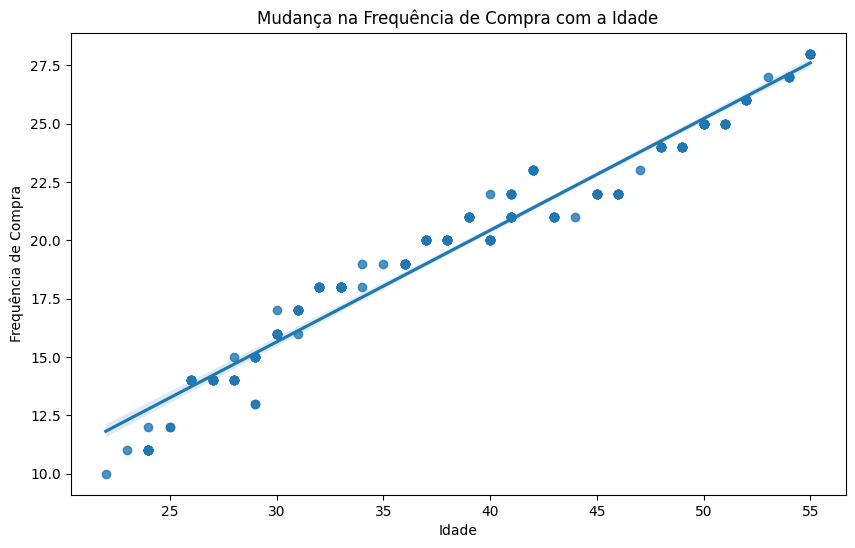

In [ ]:
plt.figure(figsize=(10, 6))
sns.regplot(x='age', y='purchase_frequency', data=df)
plt.title('Mudança na Frequência de Compra com a Idade')
plt.xlabel('Idade')
plt.ylabel('Frequência de Compra')
plt.show()

**Resposta** À medida que a idade aumenta, a frequência de compra também tende a aumentar. Os pontos no gráfico estão espalhados, mas a maioria segue uma linha de tendência ascendente, indicando que pessoas mais velhas tendem a comprar com mais frequência. A faixa etária varia de 20 a 55 anos, e a frequência de compra varia de 10 a 27,5.

                     user_id       age  annual_income  purchase_amount  \
user_id             1.000000  0.067061       0.059031         0.080621   
age                 0.067061  1.000000       0.974833         0.986140   
annual_income       0.059031  0.974833       1.000000         0.984208   
purchase_amount     0.080621  0.986140       0.984208         1.000000   
loyalty_score       0.060819  0.981835       0.984351         0.994147   
purchase_frequency  0.070541  0.980532       0.982920         0.993579   
region_East        -0.240314 -0.120806      -0.118813        -0.121547   
region_North        0.026840 -0.323050      -0.268066        -0.334926   
region_South        0.021635 -0.050134      -0.099745        -0.043284   
region_West         0.031962  0.414745       0.408519         0.420059   

                    loyalty_score  purchase_frequency  region_East  \
user_id                  0.060819            0.070541    -0.240314   
age                      0.981835            

<Axes: >

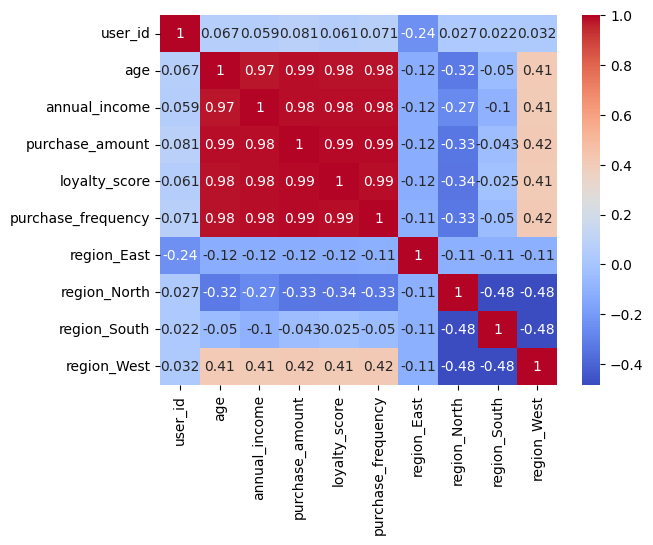

In [ ]:
# Converter a coluna 'região' em uma representação numérica usando a codificação one-hot
df = pd.get_dummies(df, columns=['region']) # Changed 'region' to 'região'

# cauculando a matrix de correlaçao
carregando_matrix = df.corr()
print(carregando_matrix)

#
# Gerando mapa de calor
sns.heatmap(carregando_matrix, annot=True, cmap='coolwarm')


**Resposta:** O heatmap mostra a correlação entre várias variáveis, como idade, renda anual, valor das compras e diferentes regiões. As cores variam de azul a vermelho, indicando valores de correlação entre -1,0 e 1,0. Variáveis como ‘annual_income’ e ‘purchase_amount’ têm uma correlação positiva forte, enquanto algumas regiões, como ‘region_North’ e ‘region_South’, mostram correlações negativas com essas variáveis. As regiões ‘East’ e ‘West’ têm correlações positivas com ‘purchase_frequency’ e ‘loyalty_score’, indicando clientes mais fiéis e com maior frequência de compra."

# insights sobre os dados:
**Distribuição Etária dos Clientes:** A faixa etária entre 40 e 50 anos parece ter a maior frequência de clientes.

**Variação da Renda Anual entre as Regiões:** A região Oeste apresenta a maior renda anual média, enquanto a região Leste tem a menor variação.

**Valor Médio de Compra por Região:** A região Oeste também lidera com o maior valor médio de compra, enquanto a região Norte tem o menor.

**Correlação entre Frequência de Compra e Valor Gasto:** Existe uma forte correlação positiva entre frequência de compra e valor gasto, indicando que clientes que compram com mais frequência tendem a gastar mais.


**Pontuação de Lealdade e Idade:** Embora não haja um gráfico específico para a correlação entre pontuação de lealdade e idade, isso pode ser analisado no heatmap. Observa-se que a pontuação de lealdade aumenta com a idade.


**Relação entre Pontuação de Lealdade e Valor das Compras:** A correlação positiva entre a pontuação de lealdade e o valor das compras sugere que clientes mais leais tendem a gastar mais.


**Segmentação de Clientes por Idade e Renda:** Segmentos de clientes de alta renda são os que mais contribuem para a receita total.

**Contribuição dos Segmentos para a Receita Total:** O segmento de alta renda é o maior contribuinte para a receita total.

**Região com Maior Número de Clientes Fiéis:** A região Oeste possui o maior número de clientes fiéis.


**Tendências de Compra entre as Regiões:** Compras mais altas são observadas na região Oeste, enquanto a região Sul apresenta uma maior variação."

**Aumento nas Compras com o Aumento da Renda:** Há uma clara tendência de aumento no valor das compras conforme a renda aumenta.


**Frequência de Compra e Idade:** A frequência de compra aumenta linearmente com a idade.

# Conclusão


Com base nos insights obtidos, o projeto fornece recomendações práticas para direcionar ações de marketing e estratégias de retenção, focando nos segmentos de clientes de maior valor e nas regiões geográficas mais lucrativas. Ao compreender melhor os consumidores e suas preferências, é possível aprimorar a experiência do cliente e aumentar o valor de cada compra.